In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout, LSTM
from tensorflow.keras.models import Sequential

In [308]:
crypto_currency="BTC"
against_currency="USD"

In [309]:
start=dt.datetime(2021,4,4)
end=dt.datetime.now()

In [310]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

In [311]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-04,58913.746094,57168.675781,57604.839844,58758.554688,50749662970,58758.554688
2021-04-05,59891.296875,57694.824219,58760.875000,59057.878906,60706272115,59057.878906
2021-04-06,59479.578125,57646.808594,59171.933594,58192.359375,66058027988,58192.359375
2021-04-07,58731.144531,55604.023438,58186.507812,56048.937500,75645303584,56048.937500
2021-04-08,58338.738281,55879.085938,56099.914062,58323.953125,53053855641,58323.953125
...,...,...,...,...,...,...
2021-12-02,57349.234375,55895.132812,57217.371094,56477.816406,32379968686,56477.816406
2021-12-03,57482.167969,52496.585938,56509.164062,53598.246094,39789134215,53598.246094
2021-12-04,53904.679688,42874.617188,53727.878906,49200.703125,61385677469,49200.703125


In [213]:
scaler = MinMaxScaler(feature_range=(0,1))

In [181]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [92]:
scaled_data

array([[0.76672684],
       [0.77465396],
       [0.75173205],
       [0.69496692],
       [0.7552171 ],
       [0.75312626],
       [0.79412869],
       [0.80503272],
       [0.79678282],
       [0.89238806],
       [0.8819599 ],
       [0.8873709 ],
       [0.84125737],
       [0.81771445],
       [0.69939617],
       [0.6863685 ],
       [0.70619837],
       [0.638217  ],
       [0.58144142],
       [0.56373405],
       [0.53611753],
       [0.50839964],
       [0.64128018],
       [0.66806453],
       [0.66254501],
       [0.62892183],
       [0.74002152],
       [0.74208392],
       [0.71038399],
       [0.72545874],
       [0.6230539 ],
       [0.73138348],
       [0.70417198],
       [0.72959305],
       [0.76792449],
       [0.75279025],
       [0.68995783],
       [0.71233042],
       [0.51227367],
       [0.52725418],
       [0.53160656],
       [0.4489691 ],
       [0.44091472],
       [0.36362164],
       [0.34698715],
       [0.19055066],
       [0.29066583],
       [0.198

In [22]:
prediction_days=60

In [43]:
xtrain,ytrain =[],[]

In [56]:
for x in range(prediction_days, len(scaled_data)):
    xtrain.append(scaled_data[x-prediction_days:x,0])
    ytrain.append(scaled_data[x,0])

In [57]:
xtrain, ytrain = np.array(xtrain),np.array(ytrain)

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [60]:
xtrain

array([[0.        , 0.0720849 , 0.08922839, ..., 0.44024935, 0.41273927,
        0.530392  ],
       [0.0720849 , 0.08922839, 0.06801727, ..., 0.41273927, 0.530392  ,
        0.4976042 ],
       [0.08922839, 0.06801727, 0.1209205 , ..., 0.530392  , 0.4976042 ,
        0.55414001],
       ...,
       [0.57970958, 0.68042619, 0.63969941, ..., 0.72934601, 0.70965607,
        0.63426019],
       [0.68042619, 0.63969941, 0.64393748, ..., 0.70965607, 0.63426019,
        0.51911919],
       [0.63969941, 0.64393748, 0.67013033, ..., 0.63426019, 0.51911919,
        0.52352172]])

In [61]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [62]:
xtrain

array([[[0.        ],
        [0.0720849 ],
        [0.08922839],
        ...,
        [0.44024935],
        [0.41273927],
        [0.530392  ]],

       [[0.0720849 ],
        [0.08922839],
        [0.06801727],
        ...,
        [0.41273927],
        [0.530392  ],
        [0.4976042 ]],

       [[0.08922839],
        [0.06801727],
        [0.1209205 ],
        ...,
        [0.530392  ],
        [0.4976042 ],
        [0.55414001]],

       ...,

       [[0.57970958],
        [0.68042619],
        [0.63969941],
        ...,
        [0.72934601],
        [0.70965607],
        [0.63426019]],

       [[0.68042619],
        [0.63969941],
        [0.64393748],
        ...,
        [0.70965607],
        [0.63426019],
        [0.51911919]],

       [[0.63969941],
        [0.64393748],
        [0.67013033],
        ...,
        [0.63426019],
        [0.51911919],
        [0.52352172]]])

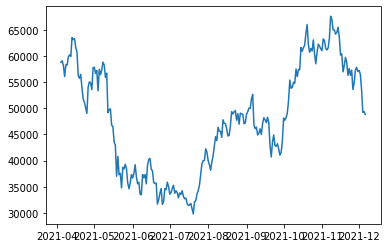

In [312]:
plt.plot(data.index,data.Close)

In [313]:
data.reset_index(inplace=True)

In [315]:
#test bot
hold=0
buy_price=0
old_price=53000
sell_price=0
new_high=0
price=1000
for i, j in data.iterrows():
    if (i>100):
        if (j.Close>old_price and hold==0):
            buy_price=j.Close
            new_high=buy_price
            print(j.Date)
            hold=1
        if (j.Close>new_high):
            new_high=j.Close
        if (hold==1 and j.Close<=new_high*.95):
            sell_price=j.Close
            print(j.Date)
            hold=2
            
print (buy_price)
print (sell_price)
print (f'You made {(sell_price/buy_price)*(price*.98)-price}')

2021-10-06 00:00:00
2021-10-21 00:00:00
55361.44921875
62210.171875
You made 101.23505251108622


In [ ]:
1035

In [114]:
t=100
r=50
if (t==100 and r==10):
    print('yep')

In [115]:
data.Close.dtypes

dtype('float64')

In [161]:
1.2*.95


1.14